---
title: Linear Latent Variable models.ipynb
layout: collection
permalink: /Machine-Learning/Linear-Latent-Variable-models
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Factor analysis

A problem with mixture models is that there is only a single latent variable, i.e. each observation can only come from one of $K$-prototypes. 
Here we now look at continious latent variables, latent variables now that come from a distribution, for example a gaussian prior

$$
\mathbf{z}_i \in \mathbb{R}^k, \quad \mathbb{P}(\mathbf{z}_i) = \mathcal{N}(\mathbf{z}_i | \mathbf{\mu}_0, \Sigma_0)
$$

![fa-DAG](fa-DAG.png)

For the observations $ \mathbf{x}_i \in \mathbb{R}^p $ we assume a Gaussian likelihood.
The probability then of our observations is given by 

$$
\mathbb{P}(\mathbf{x}_i | \mathbf{z}_i \mathbf{\theta}) = \mathcal{N}(W \mathbf{z}_i + \mathbf{\mu}, \Psi)
$$

where $W$ is the so called loading matrix, $ \mathbf{\mu}$ the mean and $ \Psi$ the covariance matrix. 
If we now assume that  $\Psi$ is a diagonal matrix, i.e. the different features do not covary, then we force our latent variables to explain the correlation

![generatie-process](fa-generative-process.png)

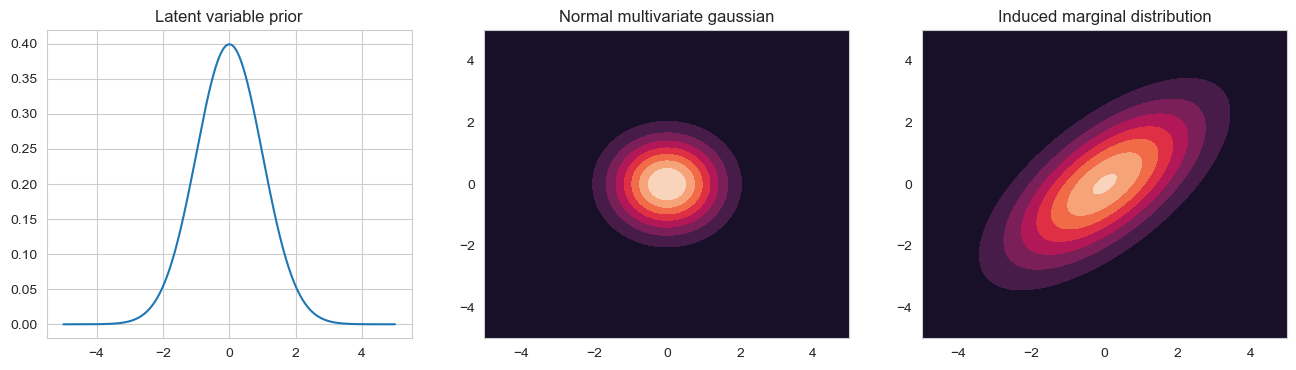

In [16]:
x = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, x)
pos = np.dstack((X, Y))
W = np.array([
    [1, 1], 
    [1, 1]]
)
mean = np.array([0, 0])
cov = np.array([
    [1, 0], 
    [0, 1]]
) 

prior = stats.norm(0, 1)
gauss = stats.multivariate_normal(mean, cov)
post = stats.multivariate_normal(W @ mean + mean, cov + W @ cov @ W.T)

fig, axs = plt.subplots(1, 3, figsize=plt.figaspect(0.25))

axs[0].plot(x, prior.pdf(x))
axs[0].set_title('Latent variable prior')

axs[1].contourf(X, Y, gauss.pdf(pos))
axs[1].set_title('Normal multivariate gaussian')

axs[2].contourf(X, Y, post.pdf(pos))
axs[2].set_title('Induced marginal distribution')

plt.show()

If we take an isotropic Gaussian sprac can and slide it along the line defined by $W \mathbf{z}_i + \mathbf{\mu}$, that is we vary $ \mathbf{z}_i$ in it's prior distribution, we induce a correlated gaussian.
This induced marginal distribution $ \mathbb{P}(\mathbf{x}_i) | \mathbf{\theta} $ is given by the integral of the observed features times the latent prior.
The marginal distribution is again a gaussian

$$
\begin{align*}
    \mathbb{P}(\mathbf{x}_i | \mathbf{\theta}) 
    &= 
    \int \mathcal{N}(\mathbf{x}_i, W \mathbf{z}_i + \mathbf{\mu}, \Psi) \mathcal{N}(\mathbf{z}_i | \mathbf{\mu}_0, \Sigma_0) d \mathbf{z}_i \\
    &=
    \mathcal{N}(W \mathbf{\mu}_0 + \mathbf{\mu}, \Psi + W \Sigma_0 W^T)    
\end{align*}
$$

If we set $ \mathbf{\mu}_0 = 0 $, we can do this without loss of generality because we can always absorb $W \mathbf{\mu}_0 into \mathbf{\mu}$. We can also set $\Sigma_0 = I$ using $ \tilde{W} = W \Sigma_0^{-1/2} $. The new covariance structure then becomes

$$
Cov[\mathbf{x}|\mathbf{\theta}] = (W\Sigma_0^{-1/2}) \Sigma_0 (W\Sigma_0^{-1/2})^T + \Psi = WW^T + \Psi
$$

Instead of using the full calculated covariance matrix of $ \mathbf{x} $ which would have $O(D^2)$ parameters (accounting for the covariance between every pair of features), we use only the diagonal covariance which has $O(D)$ parameters and add factor loading matrix $WW^T$ which has $O(LD)$ parameters, we approximate the true covariance matrix by less parameters, only $O(LD + D)$. 
The FA thus approximates the covariance matrix of $ \mathbf{x} $ using a low ranke decomposition.
Our hope then is that the latent factors $z$ will reveal some underlying description about the data. 
Thus we compute the posterior over the latent variables

$$
\mathbb{P}(\mathbf{z}_i | \mathbf{x}_i \mathbf{\theta} = \mathcal{N}(\mathbf{z}_i | \Sigma W^T \Psi^{-1} \mathbf{x}_i ,(I + W^T \Psi^{-1} W)^{-1} )  
$$

The mean of this distribution are called the latent scores, or latent factors.

Using the FA, we want maybe a large dataset with many variables and inputs to be visible in a lower dimension, i.e. we want to reduce the complexity and increase the visibility of dependecies of high dimensional features in a lower dimension. 
After obtaining our model we can try to understand the meaning of our latent factors by projecting the unit vectors of different feature space into the lower dimension and see how they vary along the axis.

# PCA

If we assume in our FA model that the covariance matrix is just a scaled identity matrix, i.e. $\Psi = \sigma^2 I$ where every component has the same variance, we get the so called Principle Component analysis (PCA). 

Given $n$ data points in $p$ dimensions 

$$
X = 
\begin{pmatrix} - & \mathbf{x}_1 & - \\ & \vdots & \\ - & \mathbf{x}_n & - \end{pmatrix} 
\in \mathbb{R}^{n \times p}
$$

we want to reduce dimensionality from $p$ to $k$ that is we want to reduce our feature space (Simplify the model). For that we choose $k$ directions $ \mathbf{w}_1, ..., \mathbf{w}_k $, arrange them as columsn in a matrix $W$

$$
W = 
\begin{pmatrix} | &  & | \\  \mathbf{w}_1 & \cdots & \mathbf{w}_k \\ | &  & |  \end{pmatrix} 
\in \mathbb{R}^{p \times k}
$$

For each column we compute then the similarity $z_j = \mathbf{w}_j^T \mathbf{x}$, that is we project $ \mathbf{x} $ down to  $ \mathbf{z} = (z_1, ..., z_k)^T  = W^T \mathbf{x} $.